In [ ]:
# # Get the data
# import zipfile
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# # Unzip the download file
# zip_ref = zipfile.ZipFile("pizza_steak.zip")
# zip_ref.extractall()
# zip_ref.close()


In [1]:
ls pizza_steak


test/  train/


In [2]:
import os

# walk throught pizza steak directory and list number  of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(
        f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [3]:
!ls -la pizza_steak

total 0
drwxr-xr-x 1 stephen stephen  18 Dec 31 07:59 .
drwxr-xr-x 1 stephen stephen 104 Dec 31 20:32 ..
drwxr-xr-x 1 stephen stephen  20 Aug 20  2020 test
drwxr-xr-x 1 stephen stephen  20 Aug 20  2020 train


In [4]:
# Another way to find out how many images are in a folder
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))
num_steak_images_test = len(os.listdir('pizza_steak/test/steak'))

num_steak_images_test, num_steak_images_train


(250, 750)

To visualize the images, first get the class names programmatically

In [5]:
# Get the class name programmatically
import pathlib
import numpy as np

data_dir = pathlib.Path('pizza_steak/train')
# Created a list of class_names for the subdirectory
class_name = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_name)


['pizza' 'steak']


In [6]:
# Visualize the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


def view_random_image(target_dir, target_class):
    # Setup the target directory to view the image from
    target_folder = target_dir+target_class

    # Get a random image pah
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")  # Show the shape of the image

    return img


['1930577.jpg']
Image shape: (512, 512, 3)


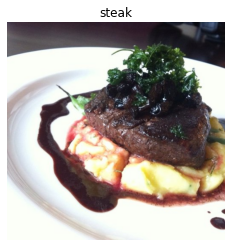

In [7]:
# View random image from training dataset
img = view_random_image(target_dir="pizza_steak/train/", target_class="steak")


In [8]:
# Convert to tensor
import tensorflow as tf
tf.constant(img)


<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 73,  62,  79],
        [ 71,  60,  77],
        [ 68,  57,  74],
        ...,
        [ 18,  12,  22],
        [ 17,  11,  21],
        [ 17,  11,  21]],

       [[ 75,  64,  81],
        [ 72,  61,  78],
        [ 69,  58,  75],
        ...,
        [ 18,  12,  22],
        [ 16,  10,  20],
        [ 15,   9,  19]],

       [[ 78,  67,  84],
        [ 75,  64,  81],
        [ 72,  61,  78],
        ...,
        [ 17,  14,  23],
        [ 14,  11,  20],
        [ 11,   8,  17]],

       ...,

       [[252, 255, 248],
        [252, 255, 248],
        [252, 255, 248],
        ...,
        [252, 255, 248],
        [252, 255, 248],
        [252, 255, 248]],

       [[252, 255, 248],
        [252, 255, 248],
        [252, 255, 248],
        ...,
        [252, 255, 248],
        [252, 255, 248],
        [252, 255, 248]],

       [[252, 255, 248],
        [252, 255, 248],
        [252, 255, 248],
        ...,
        [252, 255, 24

In [9]:
# Image shape
img.shape


(512, 512, 3)

In [10]:
# Normalize the data
img/255.


array([[[0.28627451, 0.24313725, 0.30980392],
        [0.27843137, 0.23529412, 0.30196078],
        [0.26666667, 0.22352941, 0.29019608],
        ...,
        [0.07058824, 0.04705882, 0.08627451],
        [0.06666667, 0.04313725, 0.08235294],
        [0.06666667, 0.04313725, 0.08235294]],

       [[0.29411765, 0.25098039, 0.31764706],
        [0.28235294, 0.23921569, 0.30588235],
        [0.27058824, 0.22745098, 0.29411765],
        ...,
        [0.07058824, 0.04705882, 0.08627451],
        [0.0627451 , 0.03921569, 0.07843137],
        [0.05882353, 0.03529412, 0.0745098 ]],

       [[0.30588235, 0.2627451 , 0.32941176],
        [0.29411765, 0.25098039, 0.31764706],
        [0.28235294, 0.23921569, 0.30588235],
        ...,
        [0.06666667, 0.05490196, 0.09019608],
        [0.05490196, 0.04313725, 0.07843137],
        [0.04313725, 0.03137255, 0.06666667]],

       ...,

       [[0.98823529, 1.        , 0.97254902],
        [0.98823529, 1.        , 0.97254902],
        [0.98823529, 1

## Image was divided by 255 because the maximum pixel value of images (colors) is 255

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess the data (get all of the pixel values between 0 and 1. Also normalize/scaling)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to the data directory
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directores and turn it into batches
train_data = train_datagen.flow_from_directory(
    directory=train_dir, batch_size=32, target_size=(224, 224), class_mode="binary", seed=42)
valid_data = valid_datagen.flow_from_directory(
    directory=test_dir, batch_size=32, target_size=(224, 224), class_mode="binary", seed=42)

# Build a CNN model (same as the tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3,
                           activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),  # Same as above
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    # Added to check if the model improves
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data, epochs=5, steps_per_epoch=len(
    train_data), validation_data=valid_data, validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 80s 2s/step - loss: 0.5775 - accuracy: 0.6947 - val_loss: 0.4188 - val_accuracy: 0.8220
Epoch 2/5
47/47 [==============================] - 80s 2s/step - loss: 0.4746 - accuracy: 0.7900 - val_loss: 0.3922 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 78s 2s/step - loss: 0.4454 - accuracy: 0.8000 - val_loss: 0.4477 - val_accuracy: 0.8040
Epoch 4/5
47/47 [==============================] - 78s 2s/step - loss: 0.4294 - accuracy: 0.8127 - val_loss: 0.3738 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 78s 2s/step - loss: 0.4008 - accuracy: 0.8287 - val_loss: 0.3712 - val_accuracy: 0.8280


In [12]:
model_1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [13]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
    '''
    Returns separate loss curves for training and validation metrics
    '''
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))  # how many epochs

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, loss, label='val_loss')
    plt.title('loss')
    plt.xlabel('epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, loss, label='training_accuracy')
    plt.plot(epochs, loss, label='val_accuracy')
    plt.title('accuracy')
    plt.xlabel('epochs')
    plt.legend()


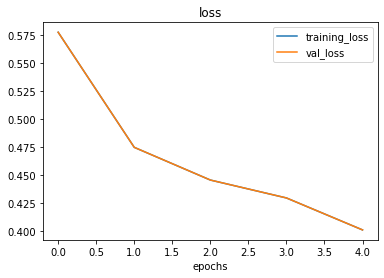

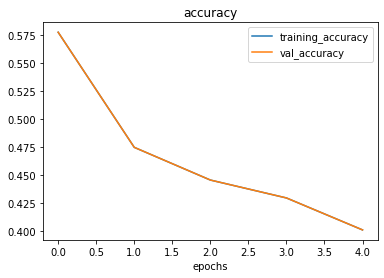

In [14]:
plot_loss_curves(history_1)
